## matplotlib

Pandas have a built-in plot module, that uses `matplotlib`, which is the main plots library in python. Here is the link: https://matplotlib.org/. In the previous notebook we have seen some samples, lets see more deeply.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("data.csv", index_col=0)

In [3]:
data.head()

,Name,Township,Province,Type,Groups,Owners,Power in MW,Lat,Lon
0,Central térmica Litoral de Almería,Carboneras,Almería,convencional,2,Endesa,1159.0,36.97778,-1.90444
1,Central térmica de Arcos,Arcos de la Frontera,Cádiz,c. combinado,3,Iberdrola,1613.0,36.67250,-5.81611
2,Central térmica Bahía de Algeciras,San Roque,Cádiz,c. combinado,2,Repsol,800.0,36.18278,-5.38944
3,Central térmica Campo de Gibraltar,San Roque,Cádiz,c. combinado,2,Naturgy / CEPSA,789.0,36.18333,-5.39306
4,Central de ciclo combinado de San Roque,San Roque,Cádiz,c. combinado,2,Endesa / Naturgy,800.0,36.19556,-5.41306


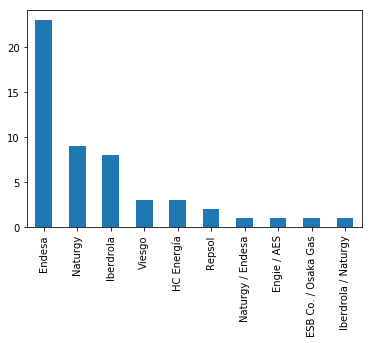

In [4]:
data['Owners'].value_counts().head(10).plot.bar();

This bar chart tells us absolute numbers, but it's more useful to know relative proportions.

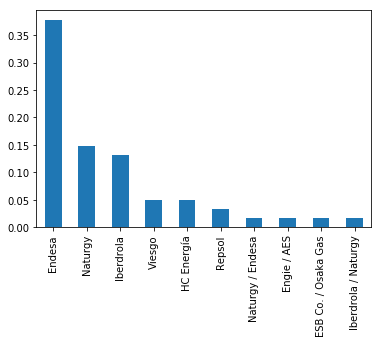

In [5]:
(data['Owners'].value_counts().head(10) / len(data)).plot.bar();

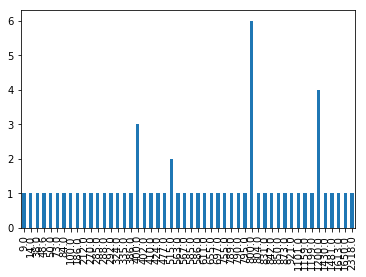

In [6]:
data['Power in MW'].value_counts().sort_index().plot.bar();

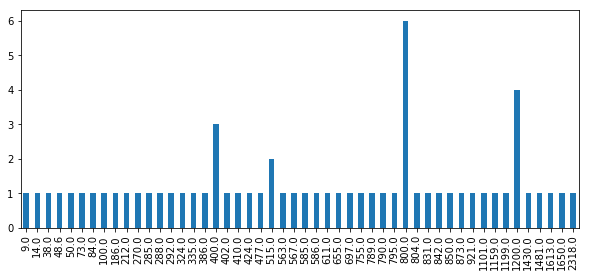

In [7]:
data['Power in MW'].value_counts().sort_index().plot.bar(figsize=(10,4));

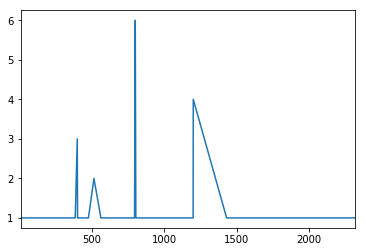

In [8]:
data['Power in MW'].value_counts().sort_index().plot.line();

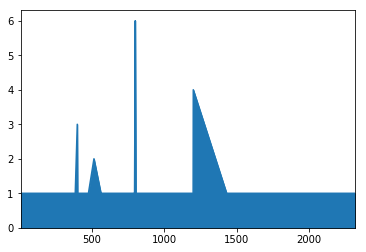

In [9]:
data['Power in MW'].value_counts().sort_index().plot.area();

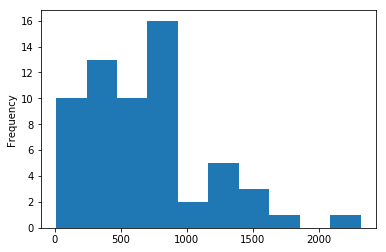

In [10]:
data['Power in MW'].plot.hist();

## Exercicies

In [11]:
pokemon = pd.read_csv("https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv",index_col=0)

In [12]:
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


1. The frequency of Pokemon by Type 1:

In [13]:
#matplotlib_ex1()

2. The frequency of Pokemon by HP:

In [14]:
#matplotlib_ex2()

3. The frequency of Pokemon by Attack:


In [15]:
#matplotlib_ex3()

## bivariate

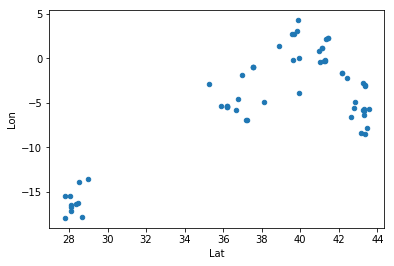

In [16]:
data.plot.scatter(x='Lat', y='Lon');

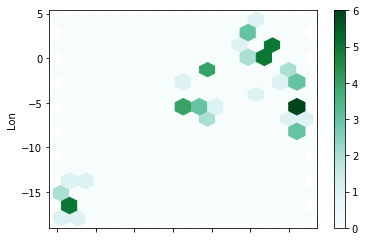

In [17]:
data.plot.hexbin(x='Lat', y='Lon', gridsize=15);

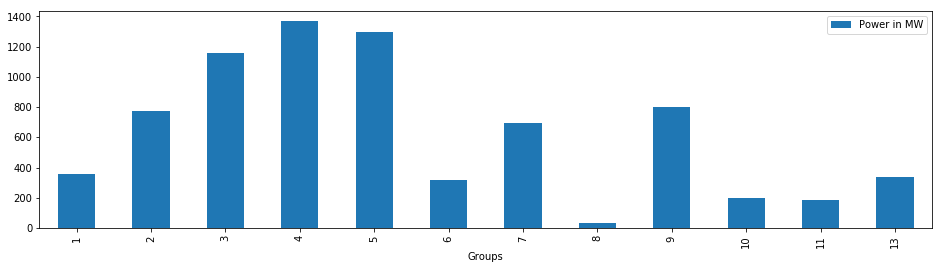

In [18]:
data.groupby("Groups").mean()[["Power in MW"]].plot.bar(stacked=True, figsize=(16,4));

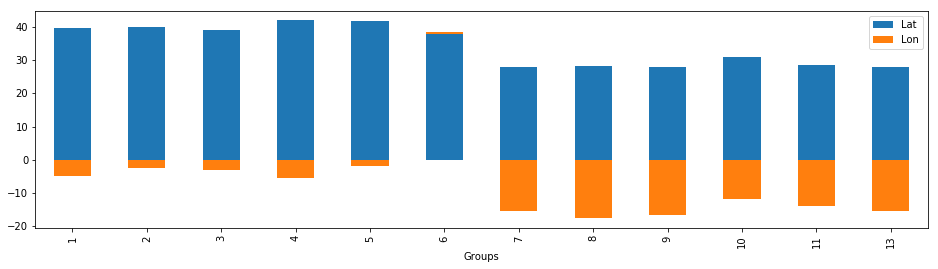

In [19]:
data.groupby("Groups").mean()[["Lat","Lon"]].plot.bar(stacked=True, figsize=(16,4));

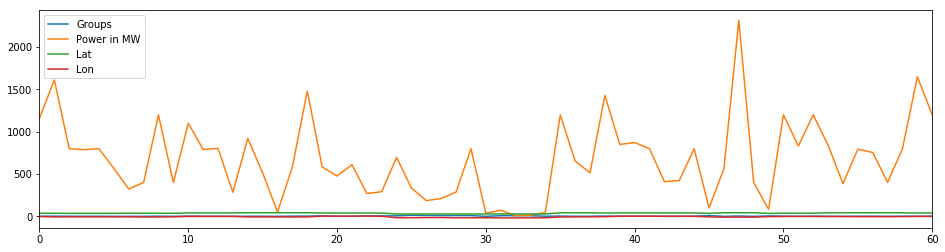

In [20]:
data.plot.line(figsize=(16,4));

## Style 

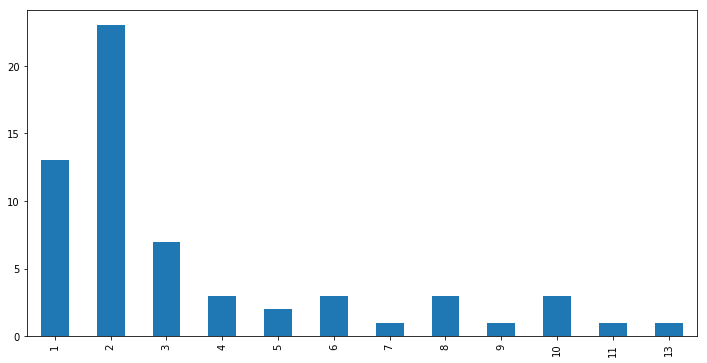

In [21]:
data['Groups'].value_counts().sort_index().plot.bar(figsize=(12, 6));

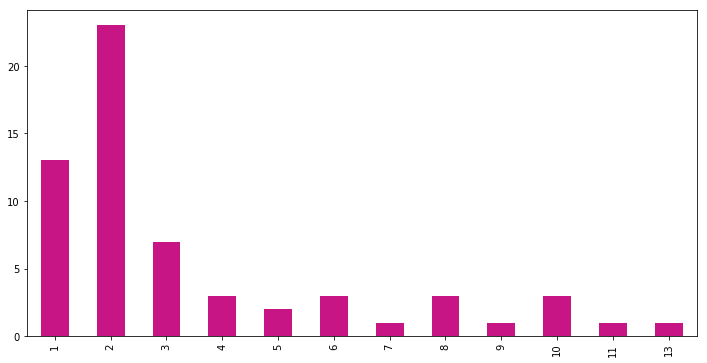

In [22]:
data['Groups'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    color='mediumvioletred'
);

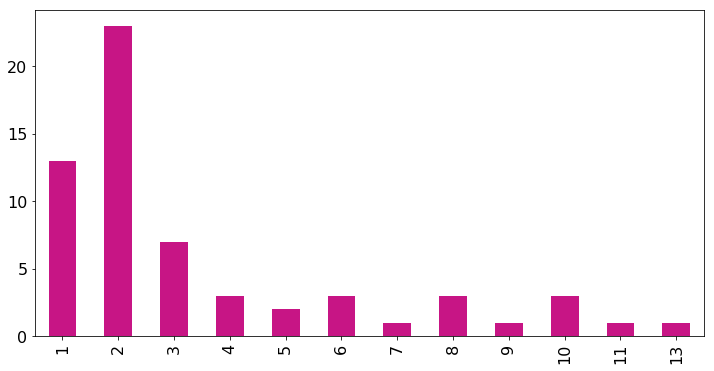

In [23]:
data['Groups'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    color='mediumvioletred',
    fontsize=16
);

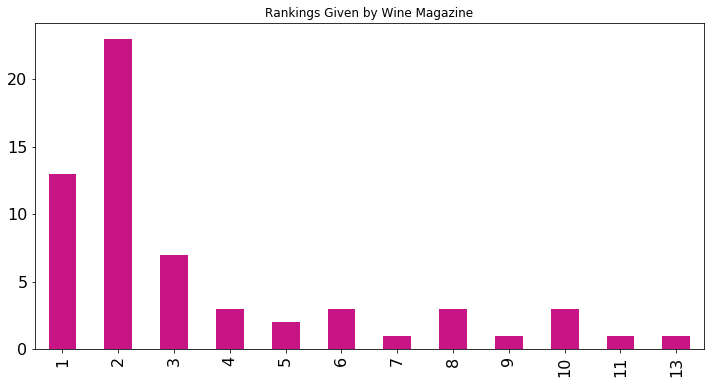

In [24]:
data['Groups'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    color='mediumvioletred',
    fontsize=16,
    title='Rankings Given by Wine Magazine',
);

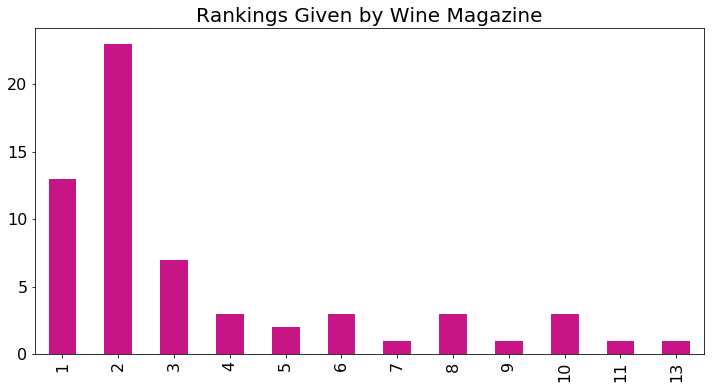

In [25]:
ax = data['Groups'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    color='mediumvioletred',
    fontsize=16
)
ax.set_title("Rankings Given by Wine Magazine", fontsize=20);

## seaborn

Basically we can plot everything with matplitlib, not just histograms and bars. A good strategy is, when you want to plot something in matplotlib, go to https://matplotlib.org/gallery/index.html and adapt the code of a similar plot to your particular example. If the plot that you want to do is quite complicated, you can look for other tools such as `seaborn` or `plotly`.

Before that, open a terminal, activate your virtual environment and type:
```
pip3 install seaborn
```

You can check their webpage for further details.
https://seaborn.pydata.org/

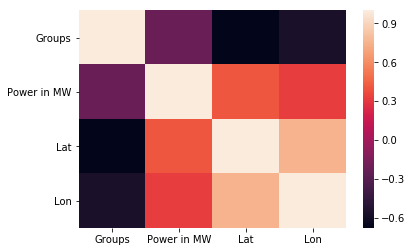

In [26]:
import seaborn as sns
corrs = data[data.columns[~data.columns.isin(["Name"])]].corr()
sns.heatmap(corrs)
plt.show();

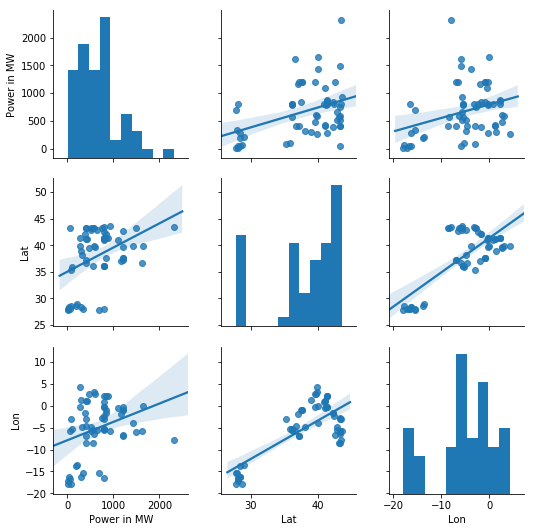

In [27]:
sns.pairplot(data[["Power in MW","Lat","Lon"]],kind="reg")
plt.show();

## plotly

There is another library called `plotly` which is slightly different because their plots are interactive, and you can plot basically whatever you want.

https://plot.ly/python/

Basically it outputs html code so if you export your jupyter-notebooks to `html` format, the plots will be interactive too in `html` format.

You will also need to exectue 
```
pip3 install plotly
```
from your virtual environment.

In [28]:
import plotly.offline as py
import plotly.figure_factory as ff

py.init_notebook_mode(connected=True)

In [29]:
fig = ff.create_facet_grid(
    data,
    x='Type',
    y='Power in MW',
    color_name='Owners',
    show_boxes=False,
    marker={'size': 5, 'opacity': 0.8},
)

In [30]:
py.iplot(fig, filename='facet by row')